In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = dict()

data_dir = "results"
for file_path in os.listdir(data_dir):
    with open(os.path.join(data_dir, file_path)) as f:
        results[file_path[:-5]] = json.load(f)

In [33]:
def get_result_table(statistic_name: str):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(data[statistic_name])
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_result_table_average(statistic_name: str, solver_names: list=[]):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if solver_names and solver_name not in solver_names:
            continue
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(
            np.average([solution[statistic_name] for solution in data["solutions"]])
            )
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_unaggregated_results(statistics_names: list, solver_name: str, problem_name: str):
    tmp_dict = {statistic_name: [] for statistic_name in statistics_names}
    for name, data in results.items():
        _problem_name, _solver_name = name.split("-")
        if _problem_name == problem_name and _solver_name == solver_name:
            for solution in data['solutions']:
                for statistic_name in statistics_names:
                    tmp_dict[statistic_name].append(solution[statistic_name])
    return pd.DataFrame(tmp_dict)


In [18]:
avg_times = get_result_table("avg_time")
avg_times.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,0.002019,0.000037,0.002046,0.002040,0.002887
chr12a,0.000079,0.000015,0.000091,0.000090,0.000102
chr22a,0.000698,0.000027,0.000715,0.000716,0.001108
els19,0.000968,0.000022,0.000984,0.000982,0.000790
esc32e,0.000361,0.000039,0.000384,0.000381,0.001017


In [5]:
avg_cost = get_result_table_average("cost")
avg_cost.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,5.445570e+06,5940358.0,5.628537e+06,5.617676e+06,5.444462e+06
chr12a,1.428020e+04,41064.0,2.448077e+04,2.253149e+04,1.384453e+04
chr22a,6.996753e+03,12420.0,1.001620e+04,9.597466e+03,6.999540e+03
els19,2.261244e+07,38627698.0,3.047952e+07,2.918356e+07,2.167573e+07
esc32e,2.000000e+00,44.0,1.462778e+01,1.399924e+01,2.000000e+00


In [6]:
optimum = get_result_table("optimal_cost")
avg_dist_to_optimum = avg_cost / optimum
avg_dist_to_optimum.head()

,GreedySearchSolver,HeuristicSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,1.003483,1.094660,1.037199,1.035198,1.003279
chr12a,1.494996,4.298995,2.562895,2.358825,1.449385
chr22a,1.136575,2.017544,1.627062,1.559042,1.137027
els19,1.313719,2.244159,1.770773,1.695482,1.259298
esc32e,1.000000,22.000000,7.313891,6.999619,1.000000


In [7]:
avg_evaluated_solutions = get_result_table_average("iteration_counts")
avg_evaluated_solutions.drop("HeuristicSolver", axis=1, inplace=True)
avg_evaluated_solutions.head()

,GreedySearchSolver,RandomSearchSolver,RandomWalkSolver,SteepestSearchSolver
bur26a,5474.197095,653.444898,4071.922764,7356.335150
chr12a,367.901395,87.069653,277.974937,506.176662
chr22a,2200.865791,303.704708,1645.226013,3364.172638
els19,3391.982659,529.544118,2527.433333,2792.596698
esc32e,718.848201,82.838833,632.351887,2177.286598


In [8]:
avg_steps = get_result_table_average("step_count")
avg_steps = avg_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
avg_steps.head()

,GreedySearchSolver,SteepestSearchSolver
bur26a,93.381743,21.634877
chr12a,14.057720,6.669343
chr22a,34.676149,13.563518
els19,55.563584,15.330975
esc32e,6.255396,3.389691


In [24]:
avg_steps = get_result_table_average("step_count")
problem_order = sorted(avg_steps.index, key=lambda x: int(''.join(filter(str.isdigit, x))))

In [36]:
def get_result_table_with_std(statistic_name: str):
    """Get mean and std of a statistic across solutions for each solver and problem"""
    means = dict()
    stds = dict()
    problem_names = []
    
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in means:
            means[solver_name] = []
            stds[solver_name] = []
            
        values = [solution[statistic_name] for solution in data["solutions"]]
        means[solver_name].append(np.mean(values))
        stds[solver_name].append(np.std(values))
        
    return pd.DataFrame(means, index=problem_names), pd.DataFrame(stds, index=problem_names)

In [10]:
import matplotlib.pyplot as plt

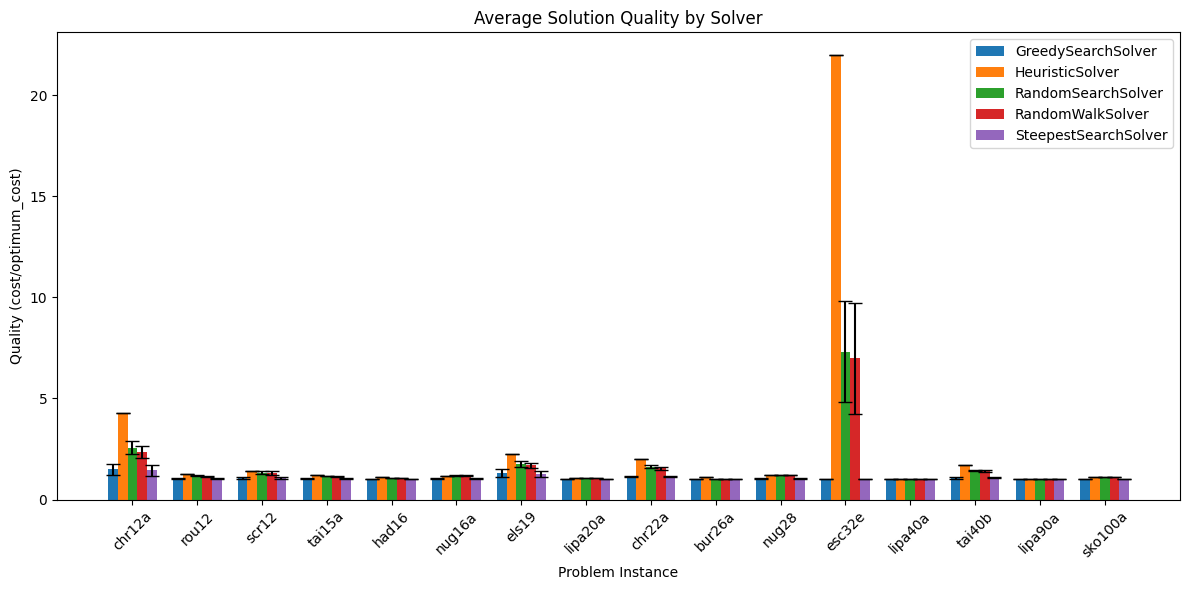

In [37]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

quality_means = quality_means.reindex(problem_order)
quality_stds = quality_stds.reindex(problem_order)

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

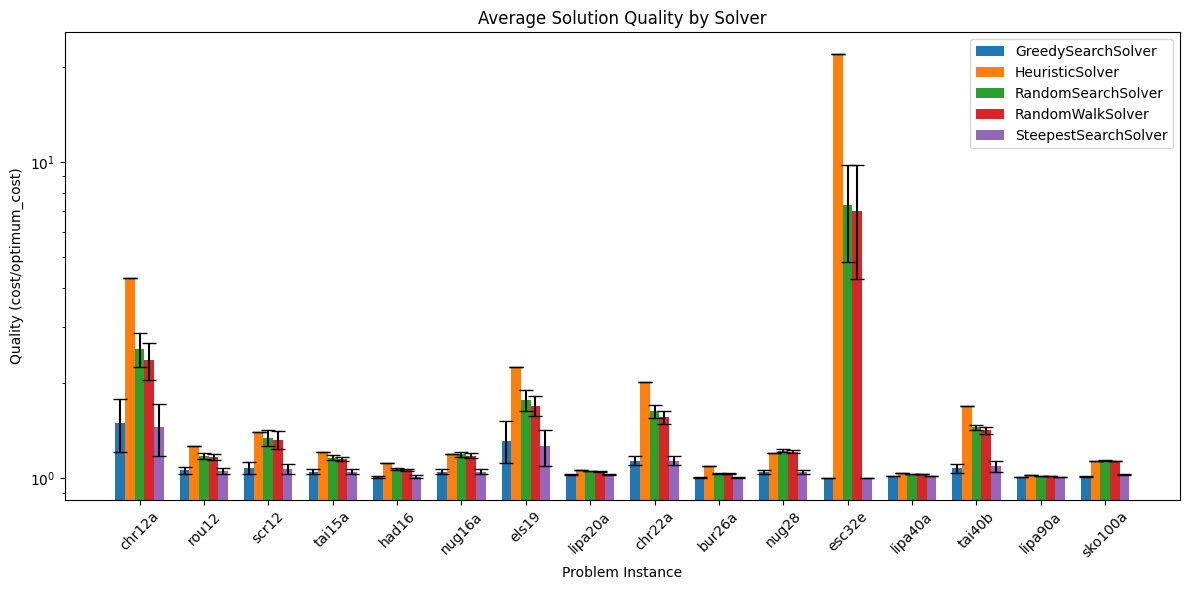

In [ ]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

quality_means = quality_means.reindex(problem_order) 
quality_stds = quality_stds.reindex(problem_order) 

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

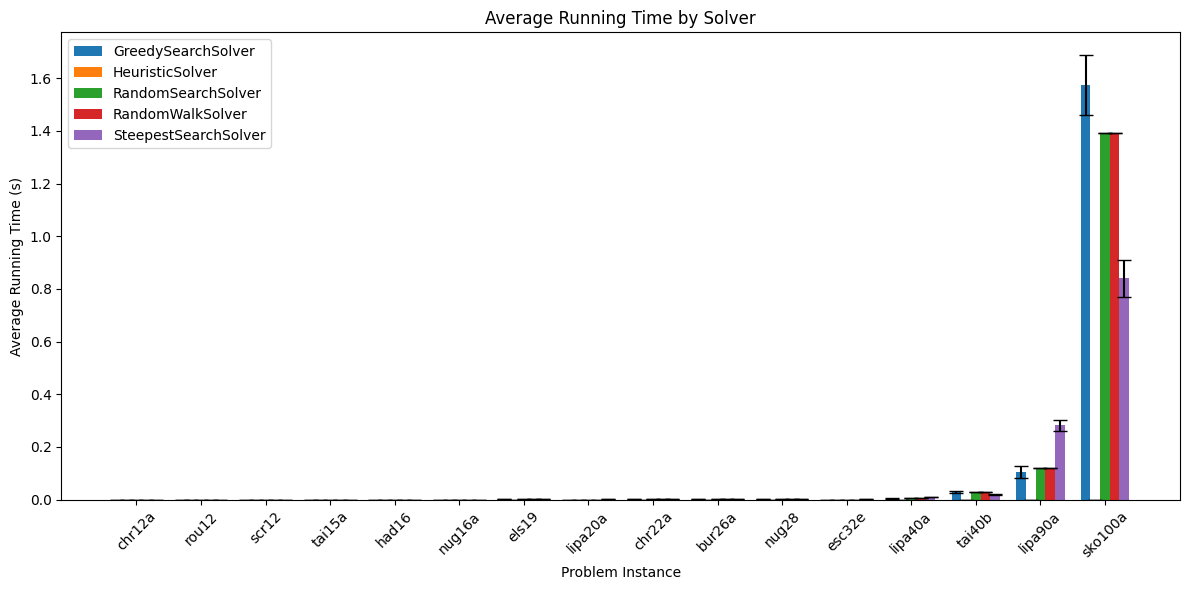

In [46]:
means_time, std_time = get_result_table_with_std("avg_time")

means_time = means_time.reindex(problem_order) 
std_time = std_time.reindex(problem_order) 

plt.figure(figsize=(12, 6))
for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
            yerr=std_time[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

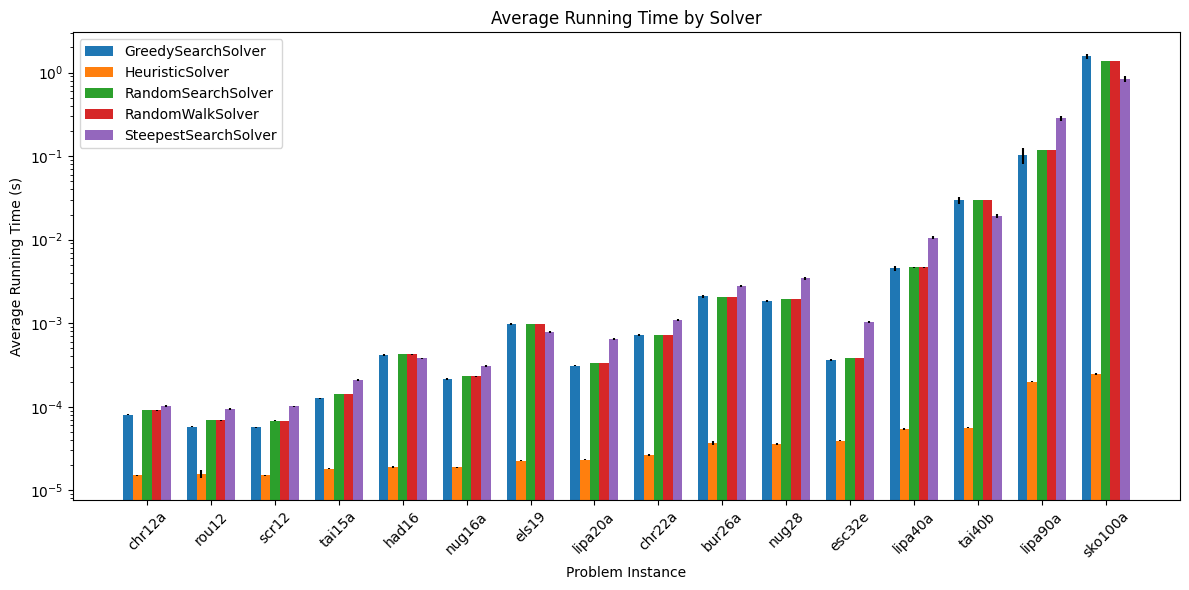

In [48]:
means_time, std_time = get_result_table_with_std("avg_time")

means_time = means_time.reindex(problem_order) 
std_time = std_time.reindex(problem_order) 

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_time.index))

for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
            yerr=std_time[solver],
            label=solver)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.tight_layout()
plt.show()

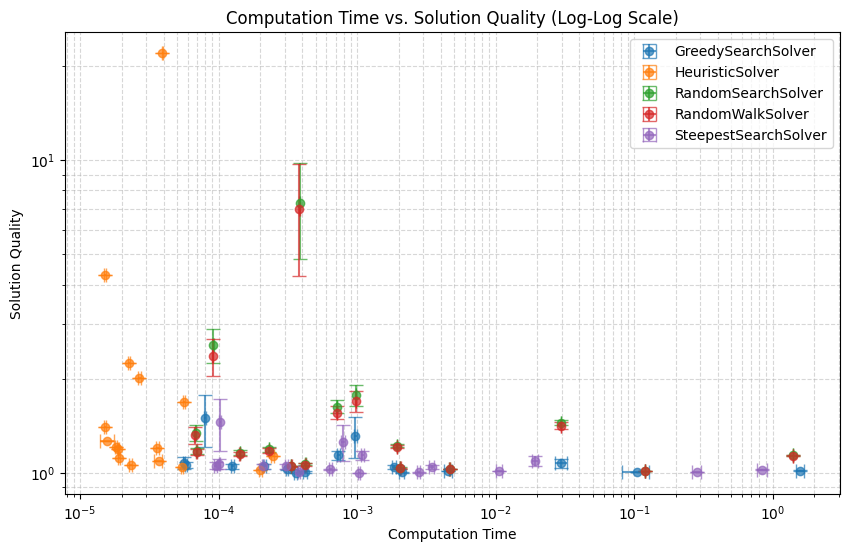

In [63]:
# Assuming the four DataFrames: quality_means, quality_stds, means_time, std_time
plt.figure(figsize=(10, 6))

# Iterate over solvers
for solver in quality_means.columns:
    plt.errorbar(
        means_time[solver], quality_means[solver],  # Swap X and Y
        xerr=std_time[solver], yerr=quality_stds[solver],  # Swap X and Y error bars
        fmt='o', label=solver, capsize=5, alpha=0.7  # Styling
    )

# Set logarithmic scales
plt.xscale("log")  # Computation time on X-axis (log scale)
plt.yscale("log")  # Solution quality on Y-axis (log scale)

plt.xlabel("Computation Time")
plt.ylabel("Solution Quality")
plt.title("Computation Time vs. Solution Quality (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)  # "both" applies to minor & major ticks
plt.show()


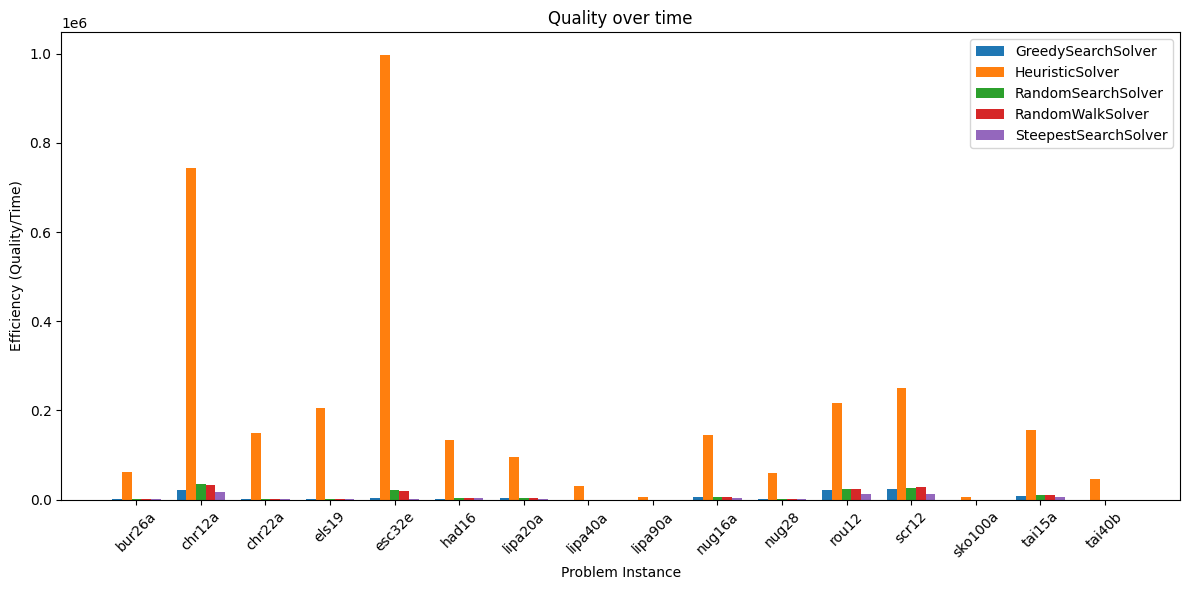

In [40]:

efficiency_means = quality_means / means_time


plt.figure(figsize=(12, 6))
for i, solver in enumerate(efficiency_means.columns):
    plt.bar(index + i * bar_width, 
            efficiency_means[solver], 
            bar_width,
        
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Efficiency (Quality/Time)')
plt.title('Quality over time')
plt.xticks(index + bar_width * 2, efficiency_means.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

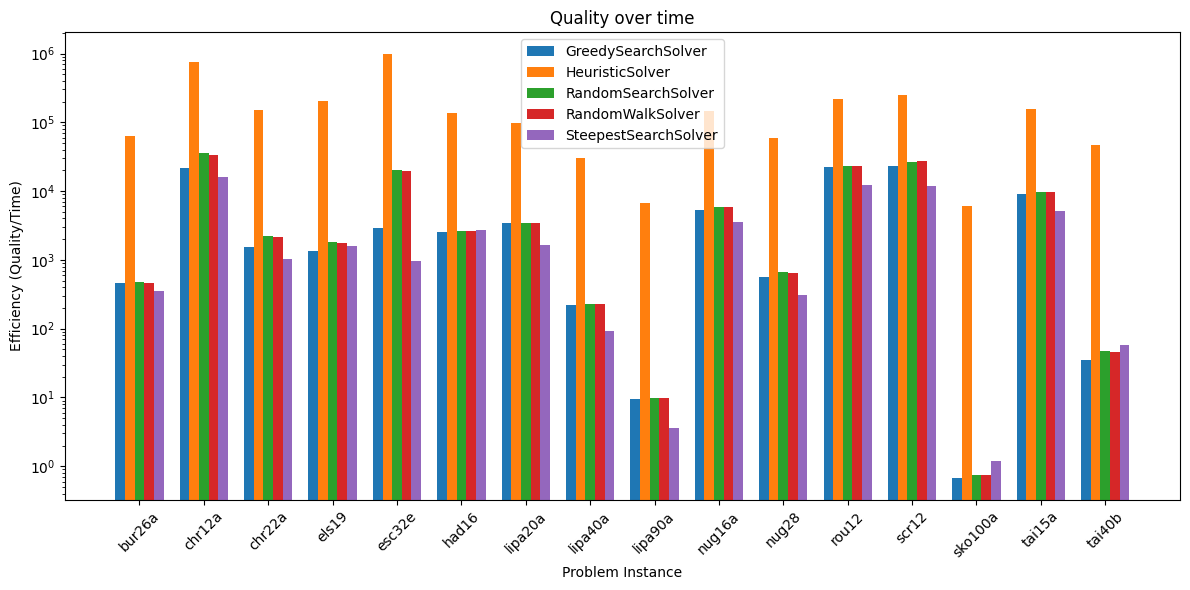

In [39]:

efficiency_means = quality_means / means_time


plt.figure(figsize=(12, 6))
for i, solver in enumerate(efficiency_means.columns):
    plt.bar(index + i * bar_width, 
            efficiency_means[solver], 
            bar_width,
        
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Efficiency (Quality/Time)')
plt.title('Quality over time')
plt.xticks(index + bar_width * 2, efficiency_means.index, rotation=45)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

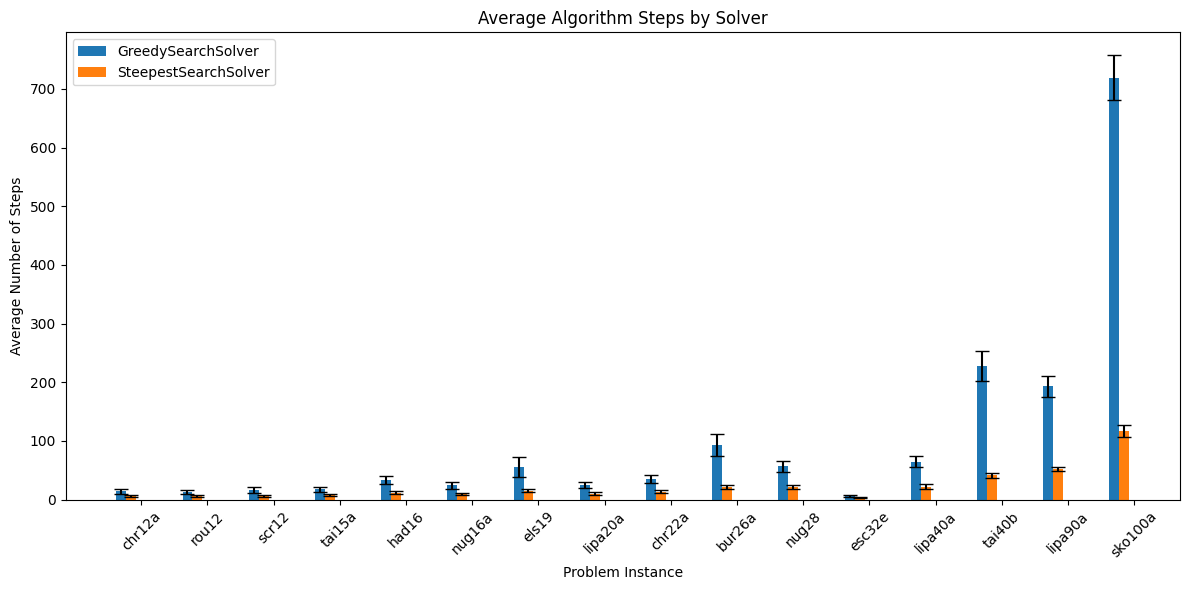

In [51]:
means_steps, stds_steps = get_result_table_with_std("step_count")
steps_data = means_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
steps_stds = stds_steps[["GreedySearchSolver", "SteepestSearchSolver"]]

steps_data = steps_data.reindex(problem_order) 
steps_stds = steps_stds.reindex(problem_order) 

plt.figure(figsize=(12, 6))
for i, solver in enumerate(steps_data.columns):
    plt.bar(index + i * bar_width, 
            steps_data[solver], 
            bar_width,
            yerr=steps_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Steps')
plt.title('Average Algorithm Steps by Solver')
plt.xticks(index + bar_width * 2, steps_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

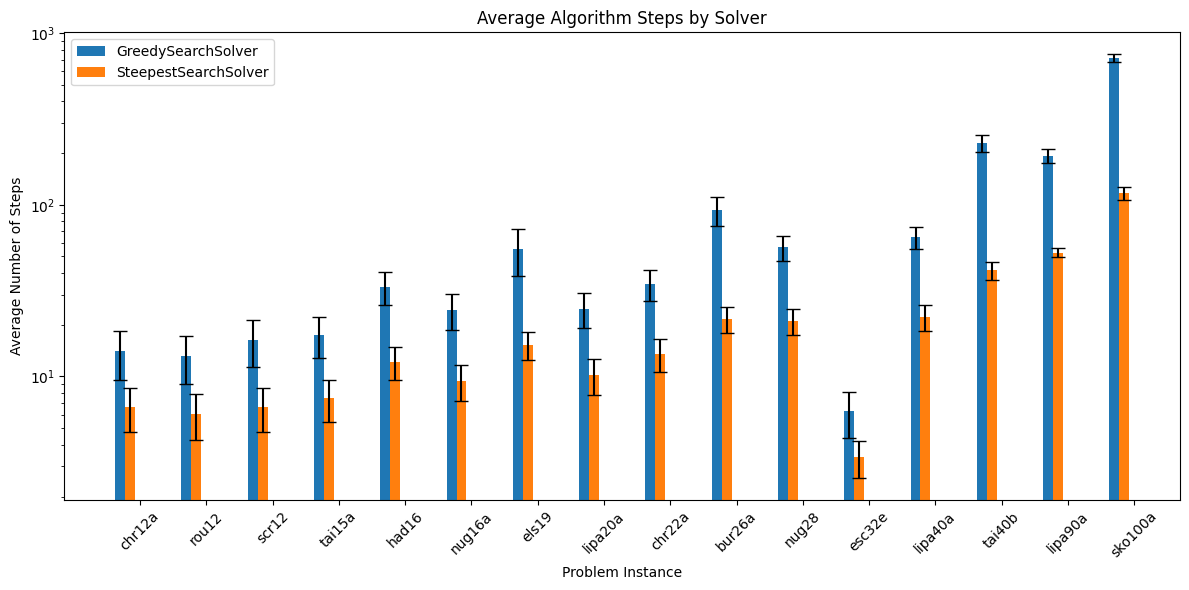

In [52]:
means_steps, stds_steps = get_result_table_with_std("step_count")
steps_data = means_steps[["GreedySearchSolver", "SteepestSearchSolver"]]
steps_stds = stds_steps[["GreedySearchSolver", "SteepestSearchSolver"]]

steps_data = steps_data.reindex(problem_order) 
steps_stds = steps_stds.reindex(problem_order) 

plt.figure(figsize=(12, 6))
for i, solver in enumerate(steps_data.columns):
    plt.bar(index + i * bar_width, 
            steps_data[solver], 
            bar_width,
            yerr=steps_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Steps')
plt.title('Average Algorithm Steps by Solver')
plt.xticks(index + bar_width * 2, steps_data.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

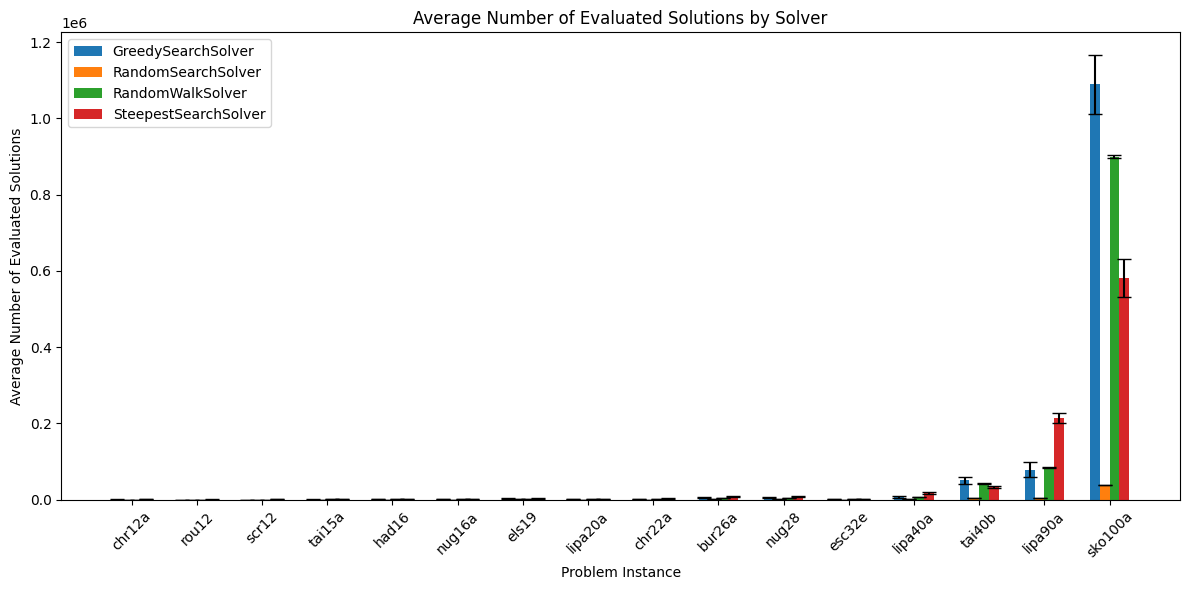

In [53]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")

means_evals = means_evals.drop('HeuristicSolver', axis=1)
stds_evals = stds_evals.drop('HeuristicSolver', axis=1)

means_evals = means_evals.reindex(problem_order) 
stds_evals  = stds_evals.reindex(problem_order) 

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



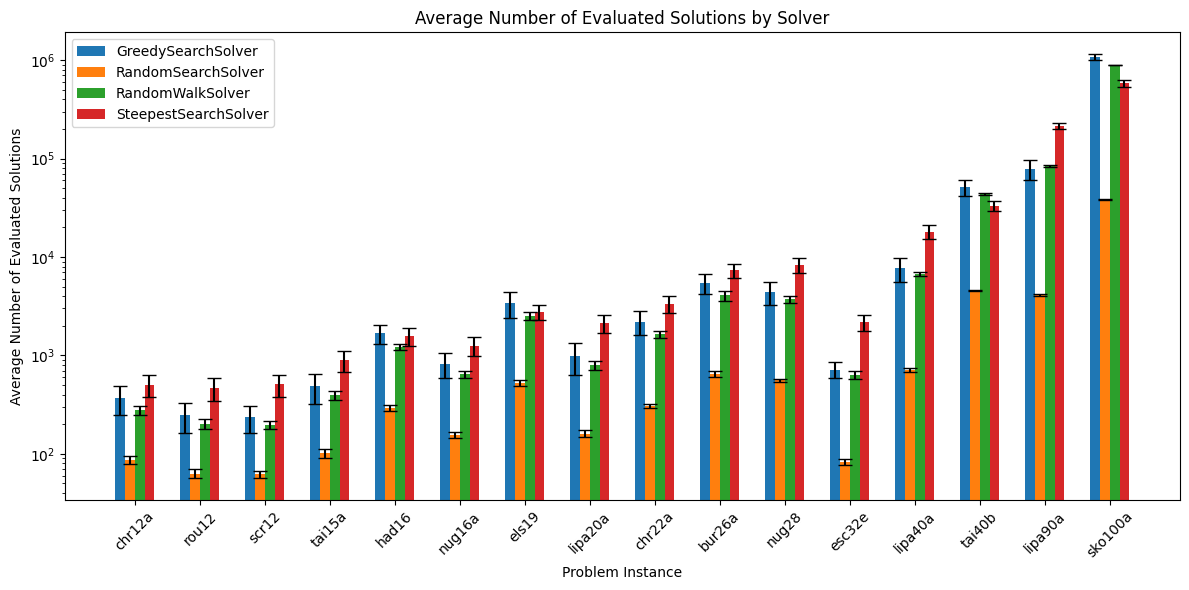

In [54]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")

means_evals = means_evals.drop('HeuristicSolver', axis=1)
stds_evals = stds_evals.drop('HeuristicSolver', axis=1)

means_evals = means_evals.reindex(problem_order) 
stds_evals  = stds_evals.reindex(problem_order) 


plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
for problem_name in problem_order:
    for solver_name in ['GreedySearchSolver', 'SteepestSearchSolver']:
        statistics = get_unaggregated_results(['cost', 'initial_cost'], solver_name, problem_name)
        if len(statistics) < 200:
            continue
        correlation = statistics['cost'].corr(statistics['initial_cost'])
        print(solver_name, problem_name, correlation, len(statistics))


GreedySearchSolver chr12a 0.004362248158827893 12474
SteepestSearchSolver chr12a -0.008237345814194882 9838
GreedySearchSolver rou12 0.01782646521749287 17307
SteepestSearchSolver rou12 -0.03076980458884439 10548
GreedySearchSolver scr12 -0.002858185521138284 17707
SteepestSearchSolver scr12 -0.03737440732433387 9896
GreedySearchSolver tai15a 0.001256219517264579 7970
SteepestSearchSolver tai15a 0.00641048032865568 4794
GreedySearchSolver had16 -0.010900392605488583 2399
SteepestSearchSolver had16 -0.018571645555577453 2647
GreedySearchSolver nug16a 0.005018711641156129 4701
SteepestSearchSolver nug16a 0.002936150448822569 3257
GreedySearchSolver els19 0.013974070003085922 1038
SteepestSearchSolver els19 -0.08914377440697406 1272
GreedySearchSolver lipa20a -0.016284829182508113 3225
SteepestSearchSolver lipa20a -0.04099720257188533 1566
GreedySearchSolver chr22a -0.009764195995676116 1371
SteepestSearchSolver chr22a -0.016889781299071226 921
GreedySearchSolver bur26a -0.030564794976047

rou12a, els19, nug28

In [62]:
def plot_cost_init_cost(solver_name:str, problem_name: str):
    statistics = get_unaggregated_results(['cost', 'initial_cost'], solver_name, problem_name)
    correlation = statistics['cost'].corr(statistics['initial_cost'])

    print(correlation)

    slope, intercept = np.polyfit(statistics['initial_cost'], statistics['cost'], 1)
    regression_line = np.poly1d((slope, intercept))

    plt.figure(figsize=(8, 6))
    plt.scatter(statistics['initial_cost'], statistics['cost'], s=5, alpha=0.7, label='Data points')
    plt.plot(statistics['initial_cost'], regression_line(statistics['initial_cost']), color='red', label=f'Regression line (r={correlation:.2f})')

    plt.xlabel('Initial Cost')
    plt.ylabel('Cost')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

0.01782646521749287


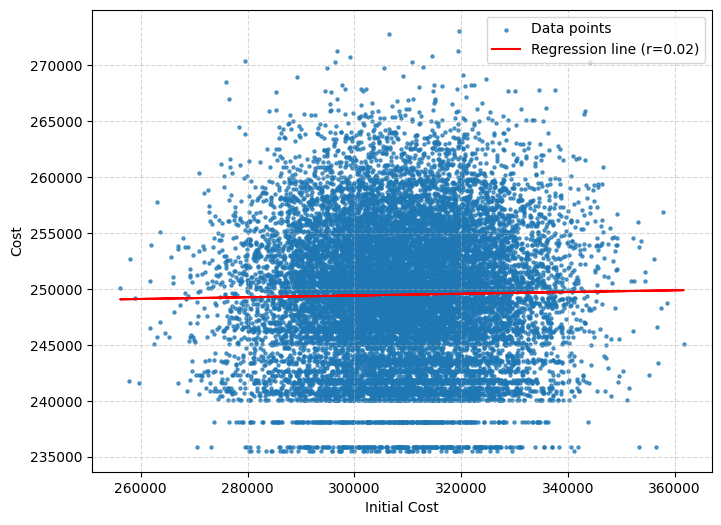

-0.03076980458884439


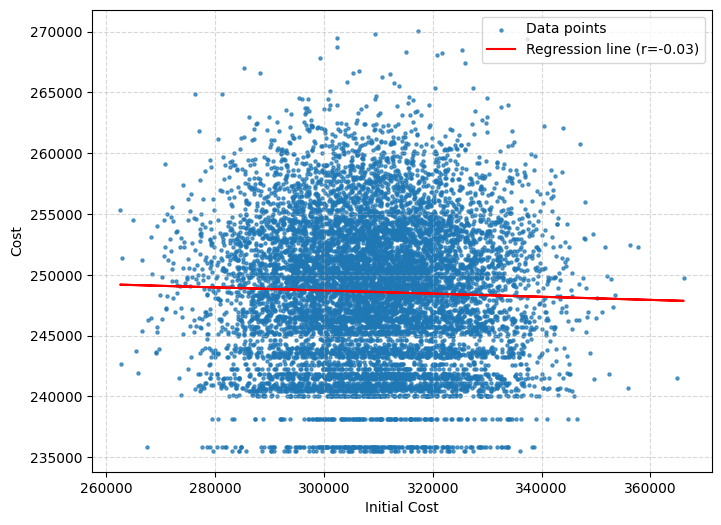

In [64]:
plot_cost_init_cost('GreedySearchSolver', 'rou12')
plot_cost_init_cost('SteepestSearchSolver', 'rou12')

0.013974070003085922


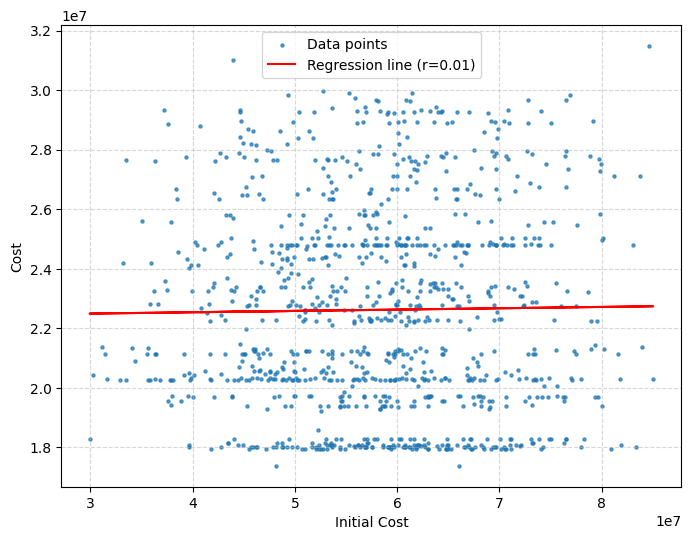

-0.08914377440697406


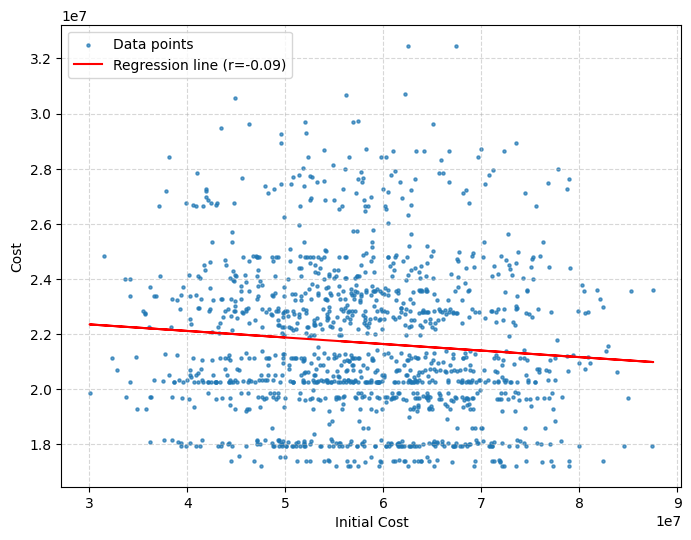

In [65]:
plot_cost_init_cost('GreedySearchSolver', 'els19')
plot_cost_init_cost('SteepestSearchSolver', 'els19')

0.02211303619650163


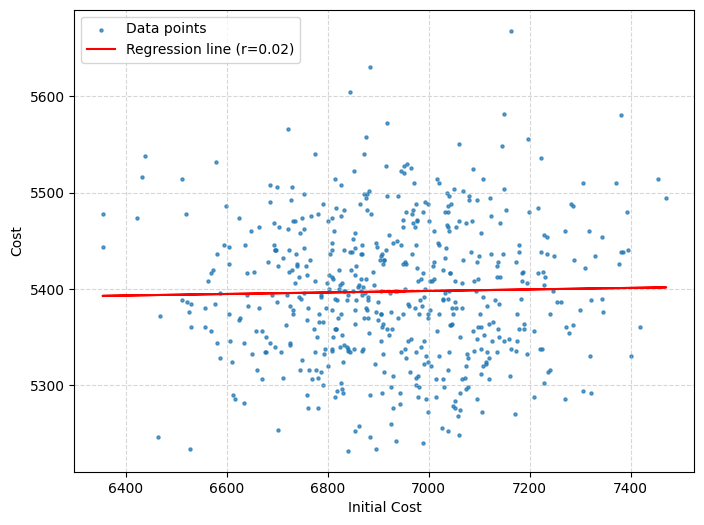

0.05805664788837393


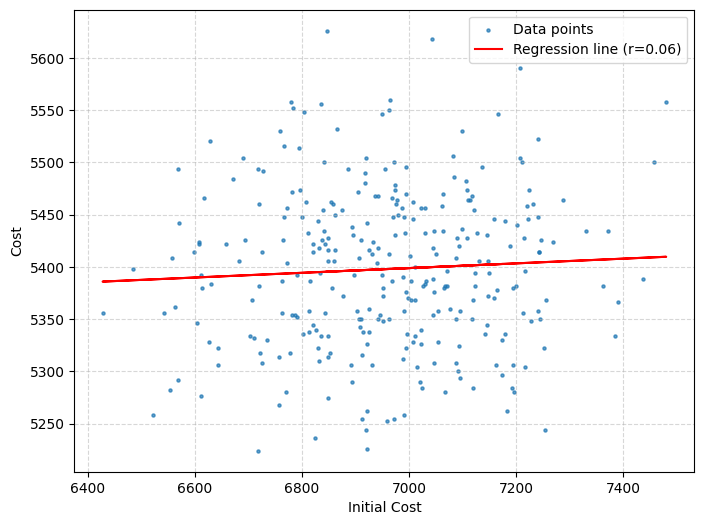

In [66]:
plot_cost_init_cost('GreedySearchSolver', 'nug28')
plot_cost_init_cost('SteepestSearchSolver', 'nug28')

restart

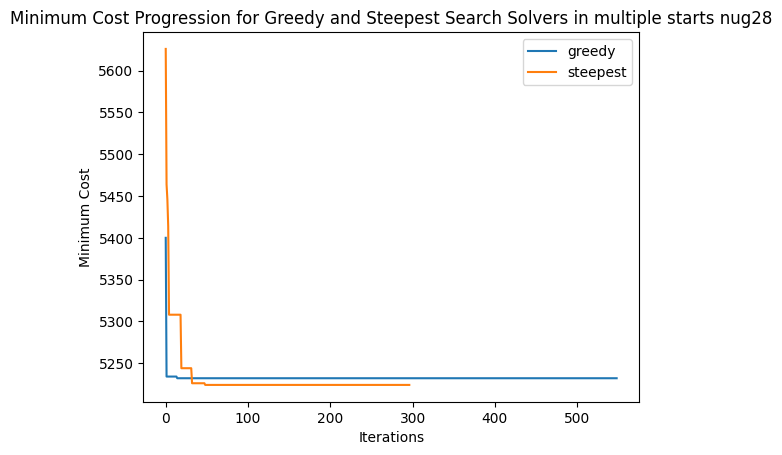

In [77]:
statistics = get_unaggregated_results(['cost'], 'GreedySearchSolver', 'nug28')
statistics['min_cost'] = statistics['cost'].expanding().min()
plt.plot(statistics['min_cost'], label='greedy')
statistics = get_unaggregated_results(['cost'], 'SteepestSearchSolver', 'nug28')
statistics['min_cost'] = statistics['cost'].expanding().min()
plt.plot(statistics['min_cost'], label='steepest')
plt.legend()
plt.title('Minimum Cost Progression for Greedy and Steepest Search Solvers in multiple starts nug28')
plt.xlabel('Iterations')
plt.ylabel('Minimum Cost')
plt.show()

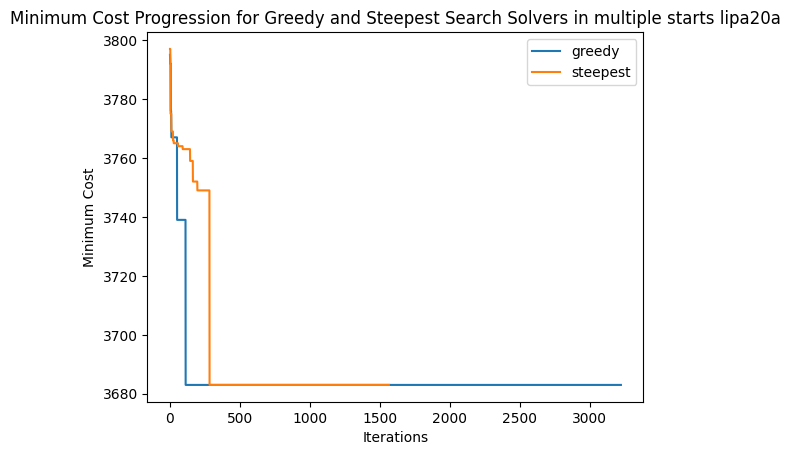

In [81]:
statistics = get_unaggregated_results(['cost'], 'GreedySearchSolver', 'lipa20a')
statistics['min_cost'] = statistics['cost'].expanding().min()
plt.plot(statistics['min_cost'], label='greedy')
statistics = get_unaggregated_results(['cost'], 'SteepestSearchSolver', 'lipa20a')
statistics['min_cost'] = statistics['cost'].expanding().min()
plt.plot(statistics['min_cost'], label='steepest')
plt.legend()
plt.title('Minimum Cost Progression for Greedy and Steepest Search Solvers in multiple starts lipa20a')
plt.xlabel('Iterations')
plt.ylabel('Minimum Cost')
plt.show()